In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sympy as sp
import pymc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
from scipy.special import beta
from scipy.misc import comb
from scipy.special import gamma

/Users/Jinkyoo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Poisson likelihood + Gamma Prior

NameError: name 'x' is not defined

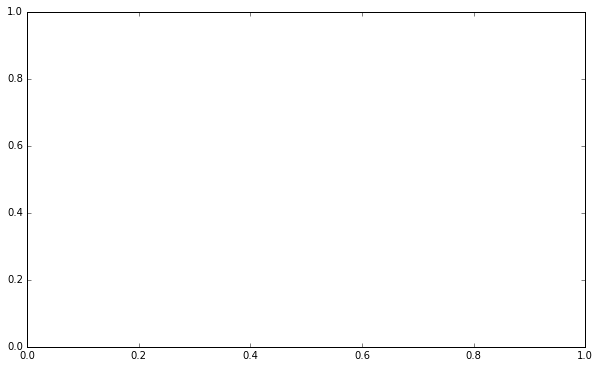

In [2]:
# Prior
a_0 = 3
b_0 = 5
Theta= np.linspace(0,5, 1000)

fig, ax = plt.subplots(figsize=(10, 6))

dist = stats.gamma(a_0, 0, 1./b_0)
plt.plot(x, dist.pdf(Theta),'b')

plt.xlim(0, 5)
#plt.ylim(0, 0.45)

plt.xlabel('$y$',fontsize=20)
plt.ylabel(r'$p(y|\alpha,\beta)$',fontsize=20)
plt.title(r'Prior distribution $Gamma(y|\alpha=3,\beta=5)$',fontsize=20)

plt.show()




# Posteriror distribution (case1)
a_0 = 3+3
b_0 = 5+2
Theta= np.linspace(0,5, 1000)

fig, ax = plt.subplots(figsize=(10, 6))

dist = stats.gamma(a_0, 0, 1./b_0)
plt.plot(x, dist.pdf(Theta),'b')

plt.xlim(0, 5)
#plt.ylim(0, 0.45)

plt.xlabel('$y$',fontsize=20)
plt.ylabel(r'$p(y|\alpha,\beta)$',fontsize=20)
plt.title(r'Posterior distribution $Gamma(y|\alpha=3+3,\beta=5+2)$',fontsize=20)

plt.show()


# Posterior distribution (case2)
a_0 = 3+30
b_0 = 5+20
Theta= np.linspace(0,5, 1000)

fig, ax = plt.subplots(figsize=(10, 6))

dist = stats.gamma(a_0, 0, 1./b_0)
plt.plot(x, dist.pdf(Theta),'b')

plt.xlim(0, 5)
#plt.ylim(0, 0.45)

plt.xlabel('$y$',fontsize=20)
plt.ylabel(r'$p(y|\alpha,\beta)$',fontsize=20)
plt.title(r'Posterior distribution $Gamma(y|\alpha=3+30,\beta=5+20)$',fontsize=20)


### Normal-Normal (Unknown mean and konwn variance)

1

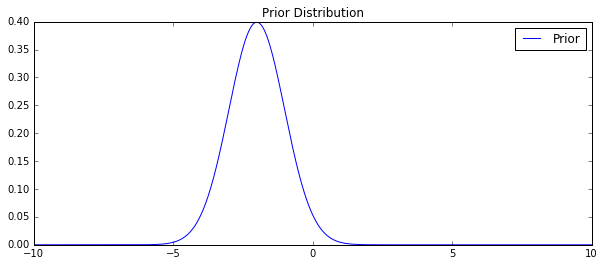

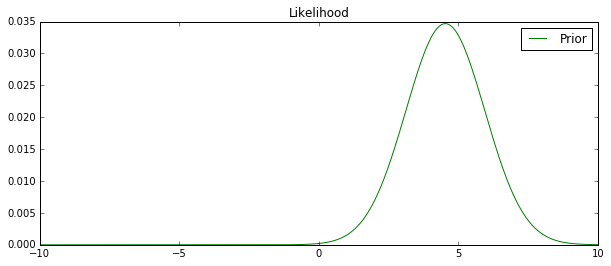

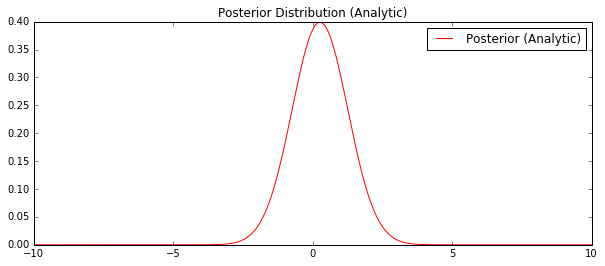

In [6]:
# Prior
mu_0 = -2.0
sigma_0 =1
Theta= np.linspace(-10,10, 1000)


#Data generation
N=2
mu_true = 4
sigma_Y = 2
y = np.random.normal(mu_true, sigma_Y, N)


# Plot the prior
val0 = stats.norm.pdf(Theta, loc=mu_0, scale=sigma_0)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(Theta, val0, 'b');
ax.set(title='Prior Distribution')
ax.legend(['Prior']);




#Lilkelihood

likelihood = np.zeros((len(Theta),len(y)))
totalLikelihood = np.zeros(len(Theta))
for i, theta in enumerate(Theta):
    likelihood[i,:] = stats.norm.pdf(y, loc=theta, scale=sigma_Y)
    totalLikelihood[i] = np.prod(likelihood[i,:])
                    
# Plot the likelihood
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(Theta, totalLikelihood, 'g');
ax.set(title='Likelihood')
ax.legend(['Prior']);    



# Posterior
mu_1 = (mu_0/sigma_0**2+y.sum()/sigma_Y**2)/(1.0/sigma_0**2+N/sigma_Y**2)
sigma_1 = np.sqrt(1.0/(   1.0/sigma_0**2 + N/sigma_Y**2 )    )


# Plot the analytic posterior
val1 = stats.norm.pdf(Theta, loc=mu_1, scale=sigma_1)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(Theta, val1, 'r');

# Plot the prior
#ax.plot(Theta, val0, 'b');

# Cleanup
ax.set(title='Posterior Distribution (Analytic)')
ax.legend(['Posterior (Analytic)', 'Prior']);

(1/sigma_0**2+N/sigma_Y**2)

### Normal-Normal (known mean and unkonwn variance)

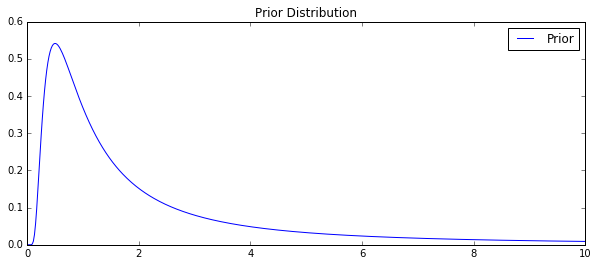

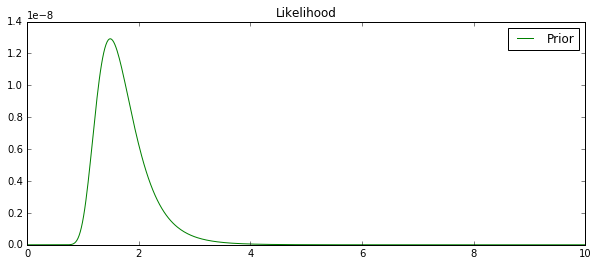

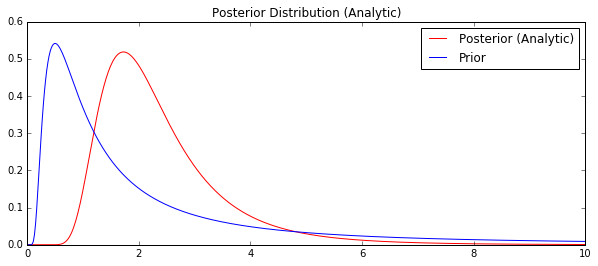

In [63]:
# Prior
a_0 = 1
b_0 = 1
Theta= np.linspace(-10,10, 1000)


#Data generation
N=10
mu_Y = 3.0
sigma_true = 1 #we need to estimate
y = np.random.normal(mu_Y, sigma_true, N)


# Plot the prior
val0 = stats.invgamma.pdf(Theta, a_0, 0, b_0) #for inverse gamma the shape parameters is not receiprocal
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(Theta, val0, 'b');
ax.set(title='Prior Distribution')
ax.legend(['Prior']);
ax.set_xlim([0, 10])




#Lilkelihood
likelihood = np.zeros((len(Theta),len(y)))
totalLikelihood = np.zeros(len(Theta))
for i, theta in enumerate(Theta):
    likelihood[i,:] = stats.norm.pdf(y, loc=mu_Y, scale=theta)
    totalLikelihood[i] = np.prod(likelihood[i,:])
                    
# Plot the likelihood
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(Theta, totalLikelihood, 'g');
ax.set(title='Likelihood')
ax.legend(['Prior']);    
ax.set_xlim([0, 10])






# Plot the analytic posterior
a_1 = a_0+N/2
b_1 = b_0+0.5*np.inner(y-mu_Y, y-mu_Y)

val1 = stats.invgamma.pdf(Theta, a_1, 0, b_1)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(Theta, val1, 'r');
ax.set_xlim([0, 10])

# Plot the prior
ax.plot(Theta, val0, 'b');

# Cleanup
ax.set(title='Posterior Distribution (Analytic)')
ax.legend(['Posterior (Analytic)', 'Prior']);

